In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re
import string
import nltk

In [2]:
df = pd.read_csv('phishing_site_urls.csv')
df

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad
...,...,...
118865,factoryhost.info/gold/dpp,bad
118866,s61.n251.n204.n199.static.myhostcenter.com/ce3...,bad
118867,raw-production.com/source/Document-Shared232/doc,bad
118868,jessieward.com/index/index.html,bad


In [3]:
df.head(10)

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad
5,smilesvoegol.servebbs.org/voegol.php,bad
6,premierpaymentprocessing.com/includes/boleto-2...,bad
7,myxxxcollection.com/v1/js/jih321/bpd.com.do/do...,bad
8,super1000.info/docs,bad
9,horizonsgallery.com/js/bin/ssl1/_id/www.paypal...,bad


In [4]:
df.describe()

,URL,Label
count,118870,118870
unique,116246,2
top,103.234.36.75/rd927.exe,bad
freq,27,70767


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118870 entries, 0 to 118869
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     118870 non-null  object
 1   Label   118870 non-null  object
dtypes: object(2)
memory usage: 1.8+ MB


In [6]:
df.shape

(118870, 2)

In [7]:
df.size

237740

In [8]:
df.isnull().sum()

URL      0
Label    0
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['Label'] = encoder.fit_transform(df['Label'])
df.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,0
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,0
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,0
3,mail.printakid.com/www.online.americanexpress....,0
4,thewhiskeydregs.com/wp-content/themes/widescre...,0


In [11]:
#Search for duplicated values
df.duplicated().sum()

2624

In [12]:
#Drop duplicated values
df = df.drop_duplicates(keep='first')

df.duplicated().sum()

0

In [13]:
#Amount of good/bad labels
df['Label'].value_counts()

Label
0    68143
1    48103
Name: count, dtype: int64

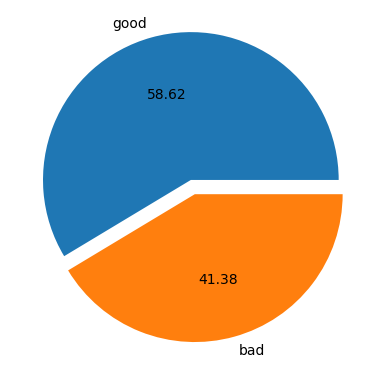

In [14]:
plt.pie(df['Label'].value_counts(), explode = [0.1,0], labels=['good','bad'],autopct="%0.2f")
plt.show()

In [15]:
df

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,0
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,0
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,0
3,mail.printakid.com/www.online.americanexpress....,0
4,thewhiskeydregs.com/wp-content/themes/widescre...,0
...,...,...
118865,factoryhost.info/gold/dpp,0
118866,s61.n251.n204.n199.static.myhostcenter.com/ce3...,0
118867,raw-production.com/source/Document-Shared232/doc,0
118868,jessieward.com/index/index.html,0


In [16]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [17]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [18]:
def URL_transform(url):
    url = url.lower()
    url = nltk.word_tokenize(url)
    
    y=[]
    for i in url:
        if i.isalnum():
            y.append(i)
            
    url = y[:]
    y.clear()

    for i in url:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    url = y[:]
    y.clear()
    
    for i in url:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [19]:
#The code above will remove all characters below
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
df['transformed_URL'] = df['URL'].apply(URL_transform)

In [21]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='black')

In [22]:
spam_wc = wc.generate(df[df['Label'] == 1]['transformed_URL'].str.cat(sep=" "))

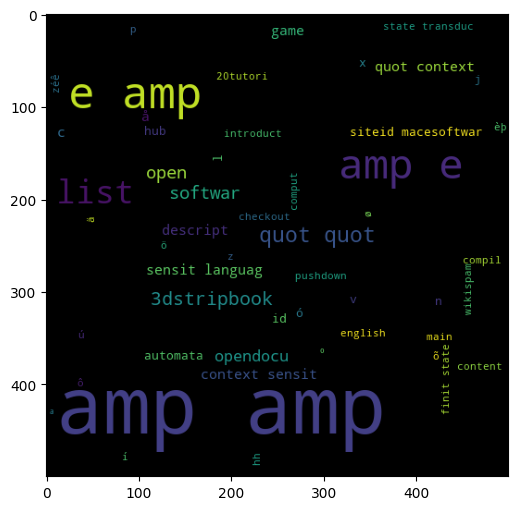

In [23]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)
plt.show()

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [25]:
X = tfidf.fit_transform(df['transformed_URL']).toarray()

In [26]:
X.shape

(116246, 2141)

In [27]:
y = df['Label'].values
y

array([0, 0, 0, ..., 0, 0, 0])

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [29]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [30]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print('Accuracy Score =', round(accuracy_score(y_test,y_pred1) * 100,2),'%')
print('Precision Score =', round(precision_score(y_test,y_pred1) * 100,2),'%')

Accuracy Score = 44.87 %
Precision Score = 42.81 %


In [31]:
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print('Accuracy Score =', round(accuracy_score(y_test,y_pred1) * 100,2),'%')
print('Precision Score =', round(precision_score(y_test,y_pred1) * 100,2),'%')

Accuracy Score = 58.18 %
Precision Score = 25.94 %


In [32]:
bnb.fit(X_train,y_train)
y_pred1 = bnb.predict(X_test)
print('Accuracy Score =', round(accuracy_score(y_test,y_pred1) * 100,2),'%')
print('Precision Score =', round(precision_score(y_test,y_pred1) * 100,2),'%')

Accuracy Score = 58.36 %
Precision Score = 29.95 %


In [33]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(bnb,open('model.pkl','wb'))